<h3 align="center"> Univariate Linear Regression with Numpy and Python </h2>

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np # for scientific computing
import pandas as pd # for managing the data
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Population vs Profit Plot')

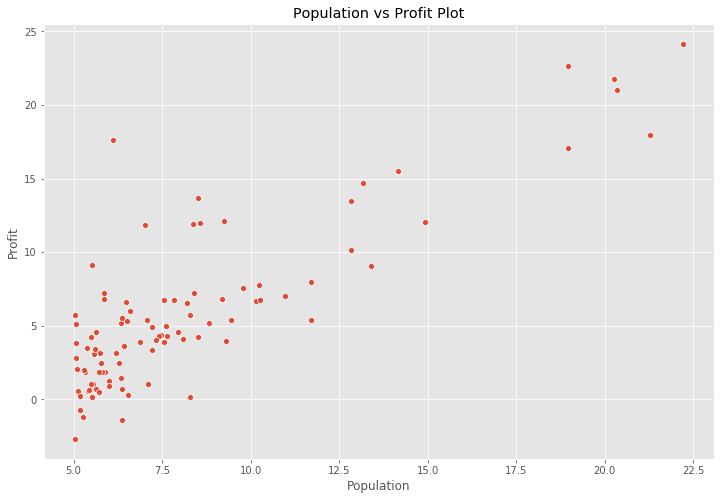

In [5]:
#plotting this data
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Population vs Profit Plot")

In [6]:
# Computing the cost J(Theta)
def cost_function (X, y, theta) :
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    return (1/(2*m)) * np.sum(error)

In [7]:
# Computing the initial cost
m = data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))
cost_function(X,y,theta)

32.072733877455676

In [8]:
# batch gradient descent
def gradient_descent (X, y, theta, alpha, iterations) :
    # size of each step = alpha (learning rate)
    m=len(y)
    costs = []
    for i in range(iterations) :
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * (1/m) * error
        costs.append(cost_function(X,y,theta))
    return theta, costs

In [9]:
# Computing the hypothesis function by calculating Theta using Gradient Descent
theta, costs = gradient_descent (X, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {} *x1".format(str(round(theta[0,0], 2)), str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18 *x1


In [10]:
# Visualizing the Cost Function

from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-10, 10, 100) # 100 evenly spaced numners between -10 and 10
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)) :
    for j in range(len(theta_1)) :
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

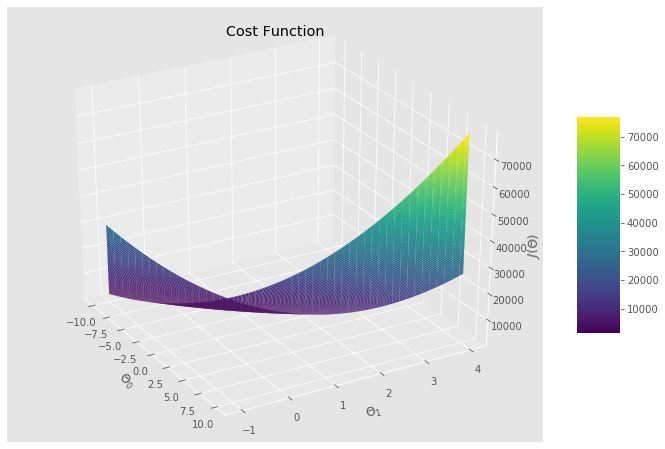

In [11]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title("Cost Function")
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

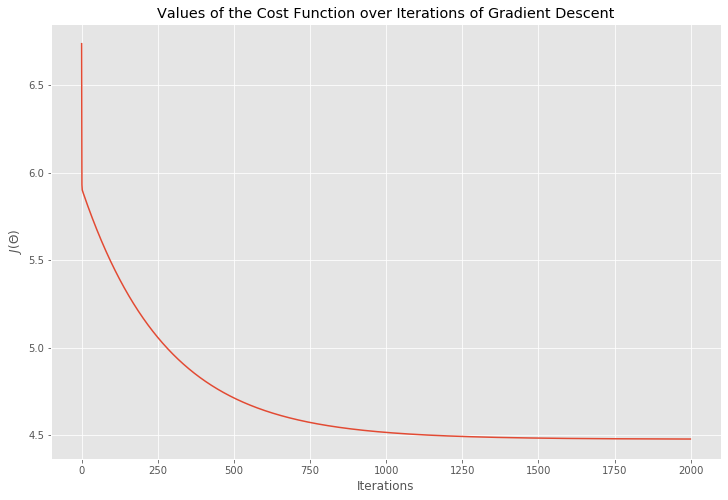

In [12]:
# Plotting the Cost Function with Number of Iterations of Gradient Descent

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")


In [13]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [14]:
theta = np.squeeze (theta)
theta


array([-3.78806857,  1.18221277])

Text(0.5, 1.0, 'Linear Regression Fit')

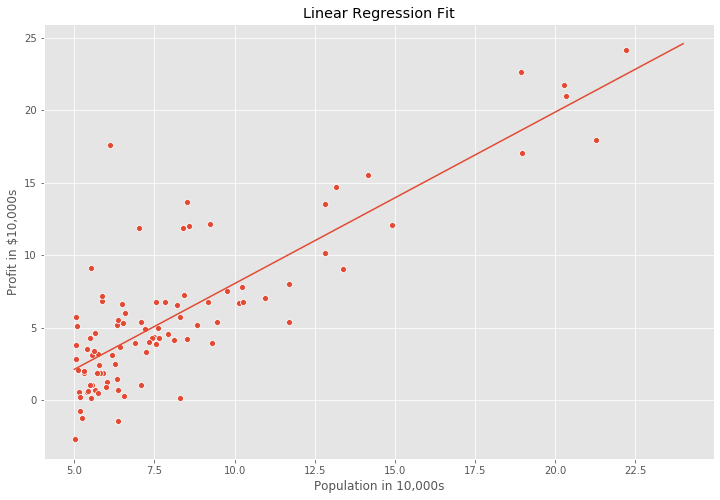

In [15]:
# scatter plot with overlay of LR fit
ax = sns.scatterplot(x="Population", y="Profit", data=data)
ax.set_title("Population vs Profit Plot")

x_value = [x for x in range (5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot (x_value, y_value)

plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

In [16]:
# Inference using the optimized theta values
def predict (x, theta) :
    y_pred = np.dot (theta.transpose(), x)
    return y_pred

In [17]:
y_pred1 = predict (np.array([1,4.1]), theta) * 10000 #4 for 41,000
print ("For a population of 41,000 people, the model predicts a profit of $" + str(round(y_pred1, 0)))

For a population of 41,000 people, the model predicts a profit of $10590.0


In [18]:
y_pred1 = predict (np.array([1,8]), theta) * 10000 #4 for 80,000
print ("For a population of 80,000 people, the model predicts a profit of $" + str(round(y_pred1, 0)))

For a population of 80,000 people, the model predicts a profit of $56696.0
